This notebook shows how to do inference with yolonas and pretrained weights using the gpu. 

Länk till YOLO NAS 2025
https://www.labellerr.com/blog/ultimate-yolo-nas-guide/ 

In [ ]:
# need to install these packages in the venv, don' know if this can be done in the notebook or must be done in the terminal
!pip install ultralytics super_gradients opencv-python


# Important Note: 
#   * Use python<=3.11 as above python version donot support super_gradients
#   * onnx may be needed to reinstall with the correct versions needed by ultralytics, for me it solved the issue with importing onnxruntime



  Using cached super_gradients-3.7.1-py3-none-any.whl.metadata (41 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.4 MB/s eta 0:00:00
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
  Using cached psutil-7.1.0-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (23 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached Deprecated-1.2.18-py2.py3-none-any.whl.metadata (5.7 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached coverage-5.3.1.tar.gz (684 kB)
  Installing build dependencies ... done
  Getting requiremen

In [ ]:
# Verify access to GPU
import torch

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Current device index:", torch.cuda.current_device())
    print("Current device name:", torch.cuda.get_device_name(torch.cuda.current_device()))
    # simple tensor operation on GPU
    x = torch.tensor([1.0, 2.0]).cuda()
    print("Tensor on GPU:", x, "device:", x.device)

PyTorch version: 2.8.0+cu128
CUDA available: True
CUDA device count: 1
Current device index: 0
Current device name: NVIDIA RTX A2000 12GB
Tensor on GPU: tensor([1., 2.], device='cuda:0') device: cuda:0


In [3]:
from ultralytics import NAS
import matplotlib.pyplot as plt
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/c21/c21ion/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [12]:
# Load a COCO-pretrained YOLO-NAS-l model
NAS = NAS("yolo_nas_l.pt")

YOLO_NAS = NAS("/home/c21/c21ion/edu/exjobb/lab/yolonas/My-First-Project-1/train/images/20251002_095654_jpg.rf.2cf7f7e08b50cd23d6084597a88a6049.jpg")

[WARNING]No module named 'pycocotools'

image 1/1 /home/c21/c21ion/edu/exjobb/lab/yolonas/My-First-Project-1/train/images/20251002_095654_jpg.rf.2cf7f7e08b50cd23d6084597a88a6049.jpg: 640x640 1 umbrella, 1 knife, 1 dining table, 31.5ms
Speed: 20.9ms preprocess, 31.5ms inference, 351.5ms postprocess per image at shape (1, 3, 640, 640)


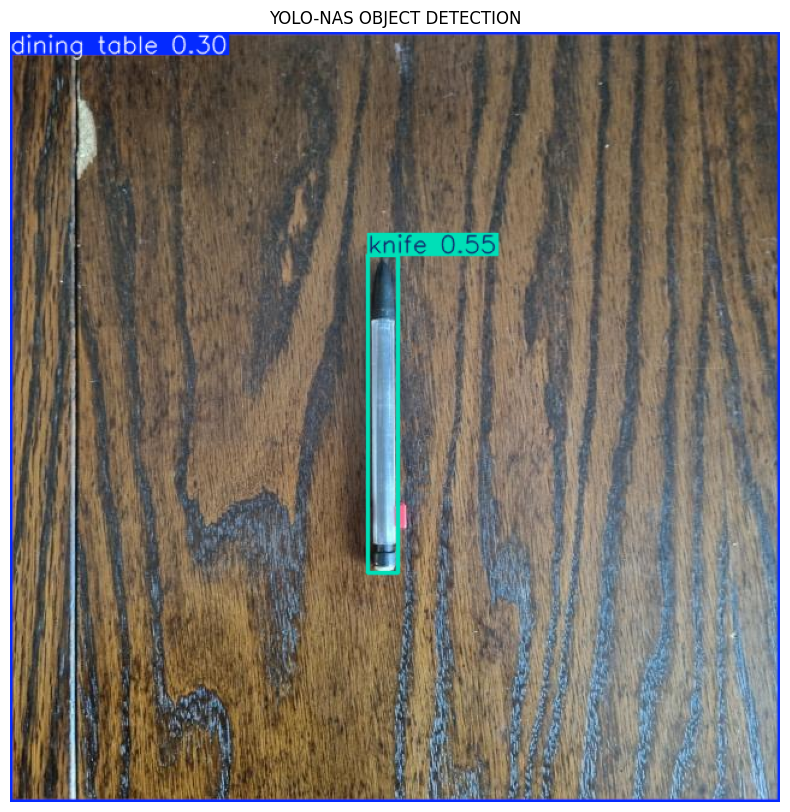

In [13]:
plt.figure(figsize=(10, 10))  # set figure size
plt.title("YOLO-NAS OBJECT DETECTION")  # set title
plt.axis('off')  # hide axes
plt.imshow(cv2.cvtColor(YOLO_NAS[0].plot(), cv2.COLOR_BGR2RGB))